In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load=os.path.join("Resources", "city_data.csv")
ride_data_to_load=os.path.join("Resources","ride_data.csv")

In [3]:
# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

In [4]:
# Get the columns and the rows that are not null.
# Get the data types of each column.
city_data_df.count()
city_data_df.notnull().sum()
city_data_df.dtypes
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [5]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Get the number of data points from the Urban/rural/suburban cities.
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
sum(city_data_df["type"]=="Rural")

18

In [7]:
# Get the columns and the rows that are not null.
ride_data_df.count()
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
#city_data_df["type"].value_counts()

In [9]:
# Read the ride data file and store it in a pandas DataFrame.
pyber_data_df=pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [10]:
#different city data frames
urban_city_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_city_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_city_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_city_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [11]:
#Get the number of rides count per city
urban_ride_count=urban_city_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_city_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_city_df.groupby(["city"]).count()["ride_id"]

In [12]:
# Get average fare for each city in the urban/suburban/rural cities.
urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_city_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_city_df.groupby(["city"]).mean()["fare"]

In [13]:
# Get the average number of drivers for each city for the urban/suburban/rural cities.
urban_driver=urban_city_df.groupby(["city"]).count()["driver_count"]
suburban_driver=suburban_city_df.groupby(["city"]).count()["driver_count"]
rural_driver=rural_city_df.groupby(["city"]).count()["driver_count"]
urban_driver.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: driver_count, dtype: float64

In [14]:
urban_driver_count=urban_city_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count=suburban_city_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_city_df.groupby(["city"]).mean()["driver_count"]

[]

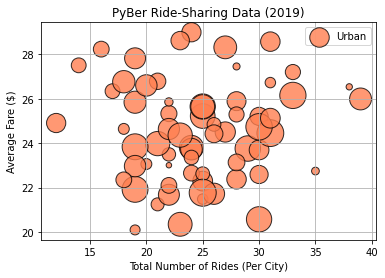

In [15]:
#urban plot
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",edgecolors="black",
           linewidths=1, alpha=0.8,label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.plot()

[]

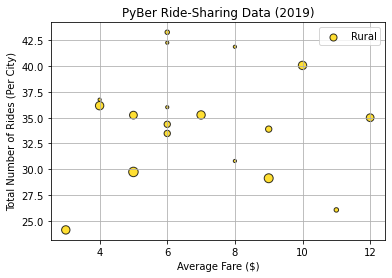

In [16]:
#rural plot
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.plot()

[]

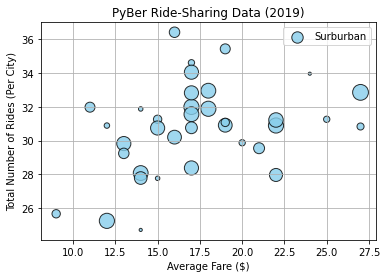

In [17]:
#surburban plot
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Surburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.plot()

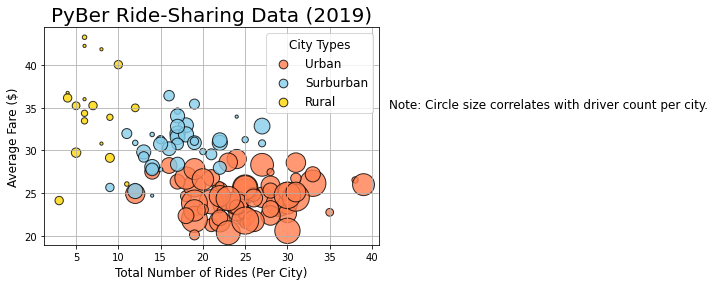

In [18]:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",edgecolors="black",
           linewidths=1, alpha=0.8,label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Surburban")
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig("Analysis/Fig1.png")
plt.show()

In [19]:
# Get summary statistics.
urban_city_df.describe()
suburban_city_df.describe()
rural_city_df.describe()


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [20]:
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [21]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2,),round(rural_ride_count.mean(),2,),round(suburban_ride_count.mean(),2)

(24.62, 6.94, 17.36)

In [22]:
# Calculate the median of the ride count for each city type.
round(rural_ride_count.median(),2,),round(suburban_ride_count.median(),2), round(urban_ride_count.median(),2,)

(6.0, 17.0, 24.0)

In [23]:
# Calculate the mode of the ride count for the each city
round(rural_ride_count.mode(),2,)
round(urban_ride_count.mode(),2,)
round(suburban_ride_count.mode(),2)

0    17
dtype: int64

In [24]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [25]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count=np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [26]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count=np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for surburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for surburban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for surburban trips is 17.0.
The mode for the ride counts for surburban trips is ModeResult(mode=array([17]), count=array([7])).


In [27]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [28]:
# Get the fares for the urban cities.
urban_fares=urban_city_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [29]:
# Get the fares for the rural cities.
rural_fares=rural_city_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [30]:
suburban_fares=suburban_city_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [31]:
# Get the driver count data from the urban cities.
urban_drivers = urban_city_df["driver_count"]
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean of urban drivers are {mean_urban_drivers:.2f}.")
median_urban_drivers=np.median(urban_drivers)
print(f"The median of urban drivers are {median_urban_drivers}.")
mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode of urban drivers are {mode_urban_drivers}.")

The mean of urban drivers are 36.68.
The median of urban drivers are 37.0.
The mode of urban drivers are ModeResult(mode=array([39]), count=array([86])).


In [32]:
rural_drivers=rural_city_df["driver_count"]
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean of rural drivers are {mean_rural_drivers:.2f}.")
median_rural_drivers=np.median(rural_drivers)
print(f"The median of rural drivers are {median_rural_drivers}.")
mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode of rural drivers are {mode_rural_drivers}.")


The mean of rural drivers are 4.30.
The median of rural drivers are 4.0.
The mode of rural drivers are ModeResult(mode=array([1]), count=array([32])).


In [33]:
suburban_drivers=suburban_city_df["driver_count"]
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean of suburban drivers are {mean_suburban_drivers:.1f}.")
median_suburban_drivers=np.median(suburban_drivers)
print(f"The median of suburban drivers are {median_suburban_drivers}.")
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode of suburban drivers are {mode_suburban_drivers}.")

The mean of suburban drivers are 13.7.
The median of suburban drivers are 16.0.
The mode of suburban drivers are ModeResult(mode=array([20]), count=array([79])).


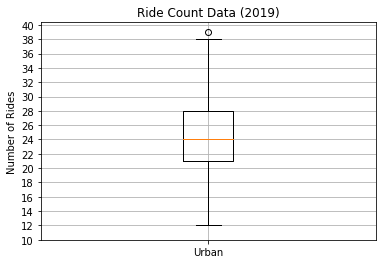

In [34]:
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

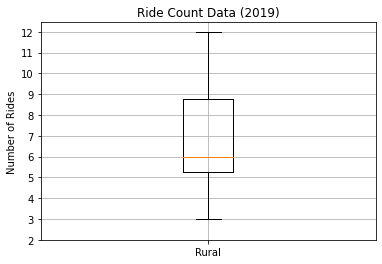

In [35]:
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2,13,step=1))
ax.grid()
plt.show()

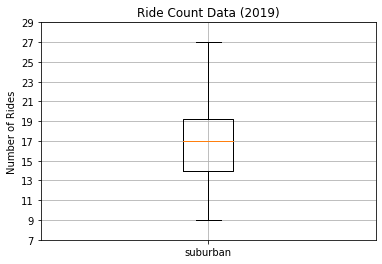

In [36]:
x_labels=["suburban"]
fix, ax=plt.subplots()
ax.boxplot(suburban_ride_count,labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(7,30,step=2.0))
ax.grid()
plt.show()

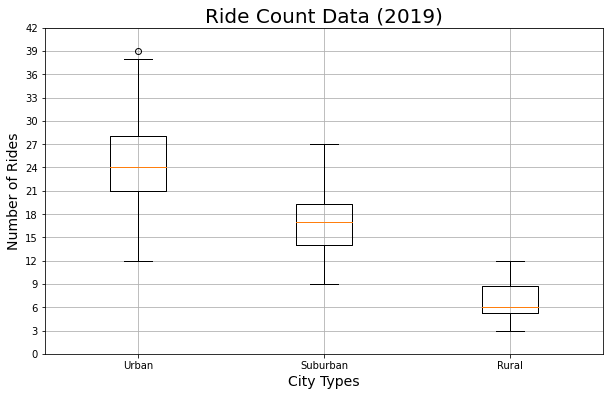

In [37]:
x_labels=["Urban", "Suburban","Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("Analysis/Fig2.png")
plt.show()

In [38]:
# Get the city that matches 39.
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Summary Statistics


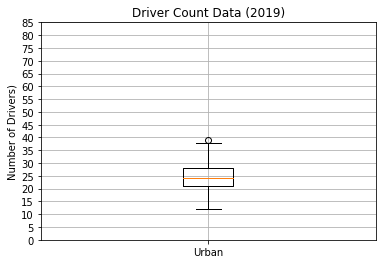

In [39]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
print("Summary Statistics")
urban_drivers.describe()
plt.show()

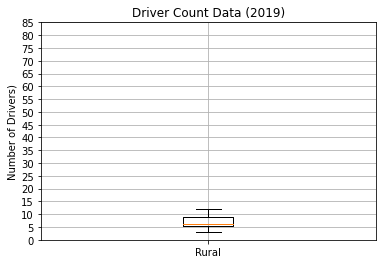

Summary Statistics


In [40]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_driver,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()
plt.show()

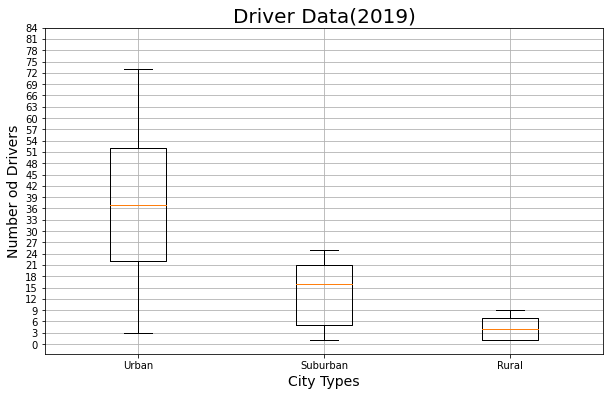

In [41]:
x_labels=["Urban", "Suburban","Rural"]
ride_driver_data=[urban_drivers,suburban_drivers,rural_drivers]
fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_driver_data,labels=x_labels)
ax.set_ylabel("Number od Drivers", fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_title('Driver Data(2019)',fontsize=20)
ax.set_yticks(np.arange(0, 85, step=3.0))
ax.grid()
plt.savefig("Analysis/Fig3.png")
plt.show()

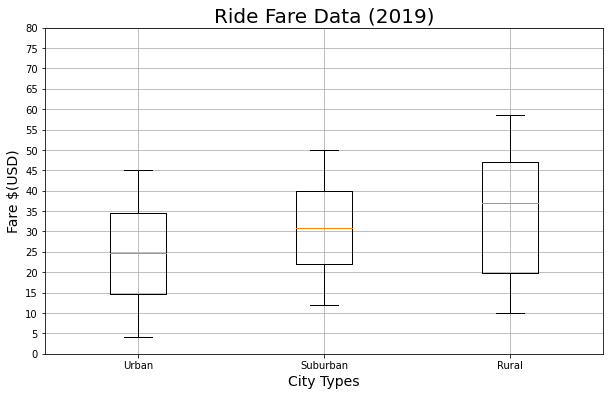

In [42]:
x_labels=["Urban", "Suburban","Rural"]
ride_fare_data=[urban_fares,suburban_fares,rural_fares]
fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data,labels=x_labels)
ax.set_ylabel("Fare $(USD)", fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_yticks(np.arange(0, 85, step=5.0))
ax.grid()
plt.savefig("Analysis/Fig4.png")
plt.show()

In [43]:
# Get the sum of the fares for each city type
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

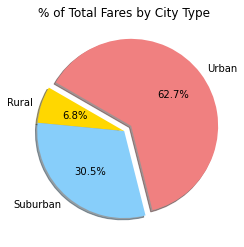

In [44]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

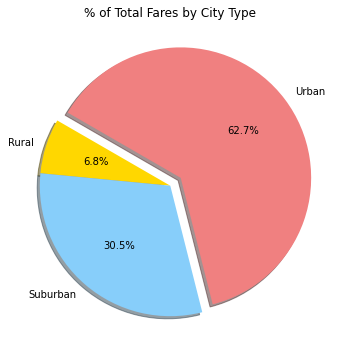

In [45]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/Fig5.png")
# Show Figure
plt.show()

In [46]:
ride_percent=100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df.count()["ride_id"]
ride_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

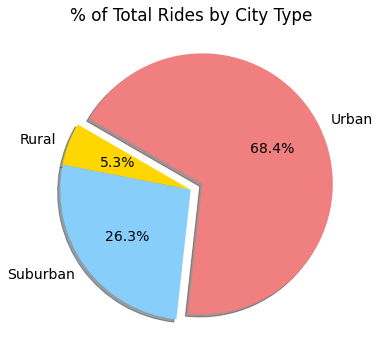

In [47]:
plt.subplots(figsize=(10,6))
plt.pie(ride_percent, labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size']=14
plt.savefig("Analysis/Fig6.png")
# Show Figure
plt.show()


In [48]:
driver_percent=100*city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df.sum()["driver_count"]
driver_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

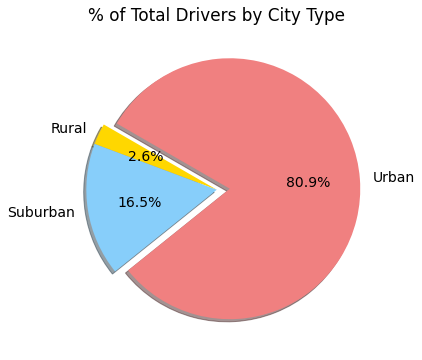

In [49]:
plt.subplots(figsize=(10,6))
plt.pie(driver_percent, labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams["font.size"]=14
plt.savefig("Analysis/Fig7.png")
plt.show()
